$$ Cost function $$
$$ cost(W,b) = \frac{1}{m}\sum_{i=1}^{m}(H(x^{(i)}) - y^{(i)})^{2} $$
$$ H(x) = Wx + b \rightarrow H = \hat{y} $$
여기서 H(x)는 선형회귀(linear regression)인데 이것을 sigmoid의 입력으로 들어감
그리고나서 sigmoid의 입력한 값의 결과가 logistic regression의 hypothesis(예측값) 모델의 결과로 나온 값이고 그것과 정답(label)과의 차이를 최소화 하려는 것이 logistic regression임.
그래서 보통 선형 회귀의 결과를 z로 표현하고 그 z를 sigmoid의 입력으로 들어감.
$$ \Sigma(z) = \frac{1}{1+e^{-z}} $$
$$ = \frac{1}{1+e^{-(Wx+b)}} $$

로지스틱 Regression의 새로운 Cost 함수
$$ c(H(x), y) =\begin{cases} 
    -log(H(x)) \leftarrow y = 1 \\
    -log(1-H(x)) \leftarrow y = 0
\end{cases} $$
$$ -ylog(H(x)) - (1-y)log(1-H(x)) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-10,10,0.01)
y_sigmoid = 1/(1+np.exp(-x))

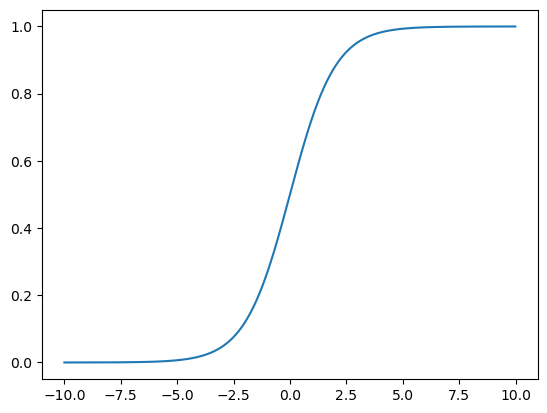

In [3]:
plt.plot(x, y_sigmoid)

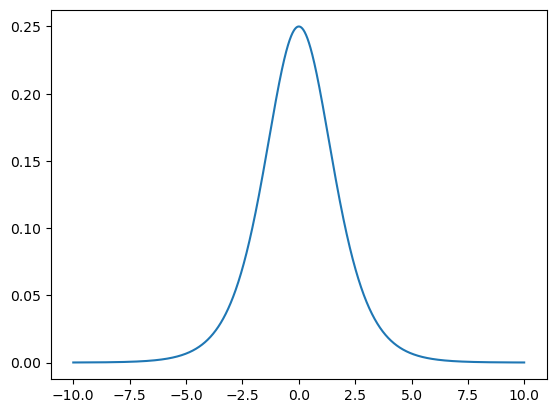

In [4]:
# 시그모이드 미분
y_sigmoid_dir = y_sigmoid * (1-y_sigmoid)
plt.plot(x, y_sigmoid_dir)

### 시그모이드 미분

$$ \sigma(x) = \frac{1}{(1+e^{-x})} $$

## chain rule(연쇄 법칙) 적용

$$ \frac{\partial \sigma}{\partial x} = 
    \frac{\partial \sigma}{\partial t} \frac{\partial t}{\partial r}
    \frac{\partial r}{\partial x} $$

합성 함수를 미분할 때 chain rule 적용함
$$ \sigma(x)는 x가 독립변수이고 sigma가 종속변수인데 $$
$$ 1 + e^{-x} = t로 치완하고 
    -x \rightarrow r로 치완함
$$
$$ 그러면 3개의 합성 함수를 미분해서 곱하면 됨 $$
$$ t = g(x) = 1 + e^{-x} = \rightarrow t는 x가 독립변수이고 t가 종속 변수 $$
$$ 여기서 또 1 + e^{-x}을 미분하기 쉽지 않아 -x \rightarrow r로 치환 $$
$$ r = f(x) = -x $$
$$ \frac{\partial \sigma}{\partial x} = 
    \frac{\partial \sigma}{\partial t} \frac{\partial t}{\partial r} 
    \frac{\partial r}{\partial x} $$
$$ \frac{\partial \sigma}{\partial t} = -\frac{1}{t^{2}} = -t^{-2} $$
$$ 그래서 각각의 종속변수를 해당 독립변수로 미분하여 곱하면 됨 $$
$$ f(g(k(x)) \rightarrow x를 k함수의 결과를 다시 g함수의 입력으로 들어가고 $$
$$ g함수의 결과가 다시 f함수의 입력으로 들어가 최종 \sigma의 결과가 나옴
$$

## 합성 함수의 chain rule 적용은 신경망에서 매우 중요함
앞에서의 결과가 다음 신경으로 전달되고 그것이 100개의 layer로 전달되어 
최종 신경망(네트워크)의 출력으로 가고 그 출력과 정답과의 차이를 최소화하도록 
업데이트됨. 

### $t^{-1}$을 미분하면 $-t^{-2}$ 
$$ \frac{\partial t}{\partial r} = e^{r} $$
$$ \frac{\partial r}{\partial x} = -1 $$
$$ \frac{e^{r}}{t^{2}} = \frac{e^{r} + 1 -1}{(1+e^{r})^{2}} 
       = \frac{e^{r}+1}{(1+e^{r})^{2}} - \frac{1}{(1+e^{r})^{2}} $$
        
$$ \frac{1}{1+e^{r}} - \frac{1}{(1+e^{r})^{2}}
= \frac{1}{1+e^{r}} (1- \frac{1}{1+e^{r}}) 
= \frac{1}{1+e^{-x}} (1- \frac{1}{1+e^{-x}}) 
= \sigma(x)(1-\sigma(x)) $$

<img src='images/합성2.PNG' />

<img src='images/합성1.gif' />

<img src='images/합성2.PNG' />

<img src='images/합성3.gif' />

$$ f(x) =cos(x) 일 경우 \frac{df}{dx} = -sin(x) $$
$$ f(x) = e^{x} 일 경우 \frac{df}{dx} = e^{x} $$
문제) 
$$ cos(e^{(3x^2+6x)}) $$
$$ \frac{df}{dx} = ? $$
풀이)
$$ e^{(3x^2+6x)} \rightarrow v $$
$$ (3x^2+6x) \rightarrow u $$
$$ f = cos(v) $$
$$ f = cos(e^{u}) $$
$$ g(x) = 3x^2+6x $$
$$ f(v) = cos(v) $$
$$ f(v) = cos(v) \rightarrow \frac{\partial f}{\partial v} = -sin(v) $$
$$ e^{u} = v \rightarrow \frac{\partial v}{\partial u} = e^{u} $$
$$ (3x^2+6x) = u \rightarrow \frac{\partial u}{\partial x} = 6x+6$$

$$ \frac{\partial f}{\partial x} = \frac{\partial f}{\partial v}
\frac{\partial v}{\partial u} \frac{\partial u}{\partial x} $$
$$ -sin(v) e^{u} (6x+6) $$
$$ -(6x+6) sin(e^{(3x^2+6x)}) e^{(3x^2+6x)} $$

In [5]:
import sympy as sp

In [7]:
x = sp.symbols('x')
f = sp.cos(sp.exp(3*x**2+6*x))
sp.diff(f)

-(6*x + 6)*exp(3*x**2 + 6*x)*sin(exp(3*x**2 + 6*x))

<img src='images/20231011_155612_609.jpg' />

In [8]:
g = sp.cos(x**2 + 6*x + sp.log(9*x**2))
sp.diff(g)

-(2*x + 6 + 2/x)*sin(x**2 + 6*x + log(9*x**2))

<img src='images/20231011_152601_080.jpg' />